In [38]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [40]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [41]:
# load the dataset
dataframe = read_csv('./data/prueba.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [42]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [43]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [44]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [45]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
trainYY = numpy.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))

IndexError: tuple index out of range

In [36]:
trainY.shape

(833,)

In [43]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
833/833 - 2s - loss: 0.0057 - 2s/epoch - 3ms/step
Epoch 2/100
833/833 - 1s - loss: 3.3938e-04 - 938ms/epoch - 1ms/step
Epoch 3/100
833/833 - 1s - loss: 2.2343e-04 - 1s/epoch - 1ms/step
Epoch 4/100
833/833 - 1s - loss: 2.3236e-04 - 1s/epoch - 1ms/step
Epoch 5/100
833/833 - 1s - loss: 2.3315e-04 - 1s/epoch - 1ms/step
Epoch 6/100
833/833 - 1s - loss: 2.3151e-04 - 1s/epoch - 1ms/step
Epoch 7/100
833/833 - 1s - loss: 2.3387e-04 - 1s/epoch - 2ms/step
Epoch 8/100
833/833 - 1s - loss: 2.2606e-04 - 1s/epoch - 1ms/step
Epoch 9/100
833/833 - 1s - loss: 2.3171e-04 - 984ms/epoch - 1ms/step
Epoch 10/100
833/833 - 1s - loss: 2.2373e-04 - 780ms/epoch - 936us/step
Epoch 11/100
833/833 - 1s - loss: 2.3429e-04 - 817ms/epoch - 980us/step
Epoch 12/100
833/833 - 1s - loss: 2.3568e-04 - 893ms/epoch - 1ms/step
Epoch 13/100
833/833 - 1s - loss: 2.2964e-04 - 1s/epoch - 1ms/step
Epoch 14/100
833/833 - 1s - loss: 2.3350e-04 - 775ms/epoch - 930us/step
Epoch 15/100
833/833 - 1s - loss: 2.3500e-04 - 793m

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [30]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [31]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 37.10 RMSE
Test Score: 113.68 RMSE


In [32]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

In [33]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict

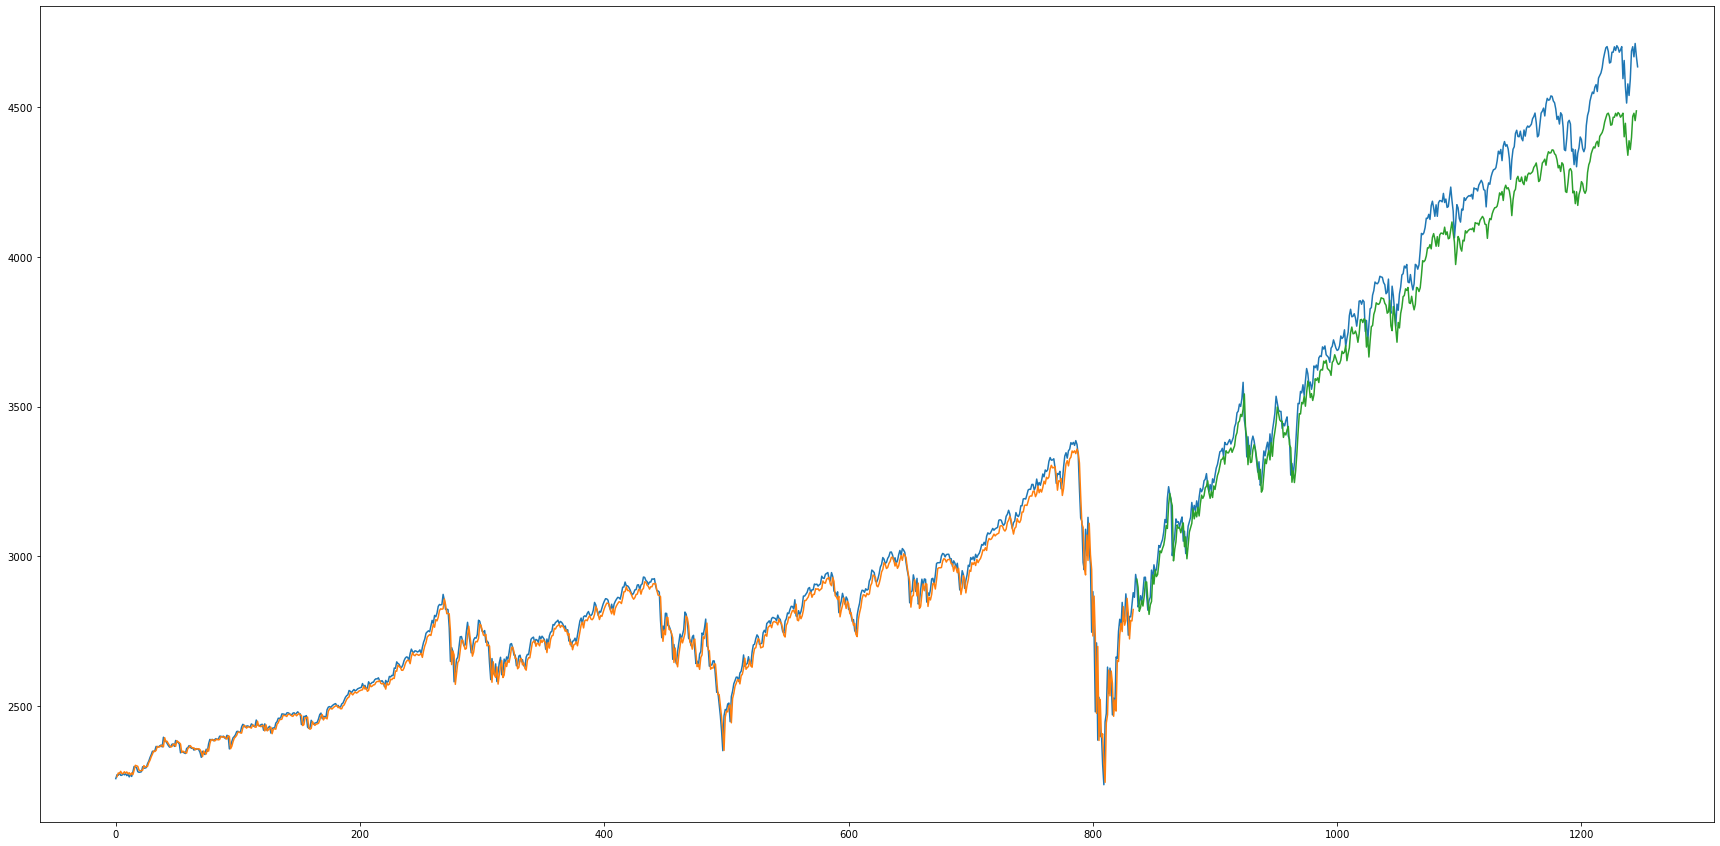

In [34]:
# plot baseline and predictions
plt.figure(figsize=(30, 15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()